<a href="https://colab.research.google.com/github/vikramrajeevreddy/Machine_Learning_HW/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [4]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Checking all the null values for each Field
column_names = train_df.columns
for column in column_names:
    print(column + ' - ' + str(train_df[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [8]:
# Pre-processing for Training data

# Remove all NULLS in the Age column in train data
most_frequent_age = train_df['Age'].median()
print(np.isnan(train_df['Age']))
train_df.loc[np.isnan(train_df['Age']), 'Age'] = most_frequent_age

# Changing sex to 0's and 1's 
train_df['Sex'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

#Typecasting the "Age" column to Int
train_df['Age'] = train_df['Age'].astype(int)

#Dropping Unnecessary Columns
drop_elements = ['Name', 'Ticket', 'Cabin']
train_df = train_df.drop(drop_elements, axis = 1)

#Map 'Embarked' to numerical values.
train_df['Embarked'] = train_df['Embarked'].map({'C':0, 'Q':1, 'S':2})

#Filling missing values in Embarked
train_df['Embarked'] = train_df['Embarked'].fillna(2)

#Create a new feature 'FamilySize' from 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1




0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool


In [9]:
# Pre-processing for Test data


# Changing sex to 0's and 1's 
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# 2.Remove all NULLS in the Age column in test data
most_frequent_age = test_df['Age'].median()
test_df.loc[np.isnan(test_df['Age']), 'Age'] = most_frequent_age

#Typecasting the "Age" column to Int
train_df['Age'] = train_df['Age'].astype(int)

#Dropping Unnecessary Columns
drop_elements = ['Name', 'Ticket', 'Cabin']
test_df  = test_df.drop(drop_elements, axis = 1)

#Map 'Embarked' to numerical values.
test_df['Embarked'] = test_df['Embarked'].map({'C':0, 'Q':1, 'S':2})

#Filling missing values in Embarked
test_df['Embarked'] = test_df['Embarked'].fillna(2)


#Create a new feature 'FamilySize' from 'SibSp' and 'Parch'
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1




In [10]:
train_df.head(889)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,1,22,1,0,7.2500,2.0,2
1,2,1,1,0,38,1,0,71.2833,0.0,2
2,3,1,3,0,26,0,0,7.9250,2.0,1
3,4,1,1,0,35,1,0,53.1000,2.0,2
4,5,0,3,1,35,0,0,8.0500,2.0,1
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,1,25,0,0,7.0500,2.0,1
885,886,0,3,0,39,0,5,29.1250,1.0,6
886,887,0,2,1,27,0,0,13.0000,2.0,1
887,888,1,1,0,19,0,0,30.0000,2.0,1


In [11]:
f = train_df.drop("Survived", axis=1)
t = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(f,t,test_size=0.25,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((668, 9), (223, 9), (668,), (223,))

Decision Tree Accuracy: 76.23
The five fold cross validated score for the Decision Tree classifier is: 77.68


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


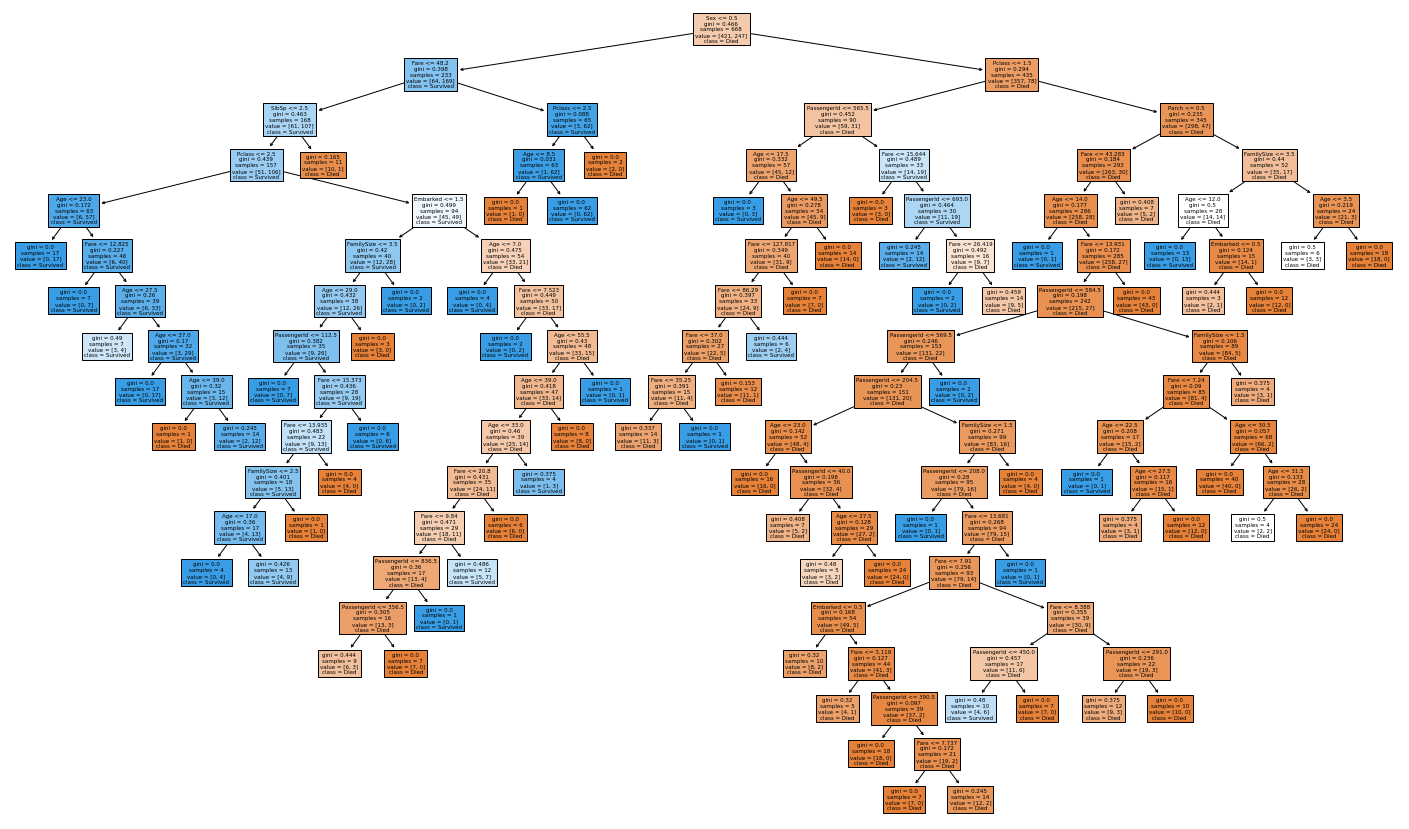

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(criterion='gini', min_samples_split=15,min_samples_leaf=1,max_features=5)
t1 = model.fit(X_train,y_train)

prediction_tree = model.predict(X_test)
print('Decision Tree Accuracy:',round(accuracy_score(prediction_tree,y_test)*100,2))

kfold = KFold(n_splits=5, random_state= 1)
result_tree = cross_val_score(model,f,t,cv=5,scoring='accuracy')

print('The five fold cross validated score for the Decision Tree classifier is:',round(result_tree.mean()*100,2))

fig = plt.figure(figsize=(25,15))
plot = tree.plot_tree(
    model, 
    feature_names = list(train_df.drop(['Survived'], axis=1)),
    class_names = ['Died', 'Survived'],
    filled=True)


In [13]:
model = RandomForestClassifier(
    criterion='gini',
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    n_jobs=-1)

model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=5)
result_rm=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,f,t,cv=5)

The accuracy of the Random Forest Classifier is 78.48
The cross validated score for Random Forest Classifier is: 80.82


In [24]:
clf = svm.SVC(kernel='linear')    # create the new kernel
clf.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for Linear Kernel:", accuracy_score*100)

Accuracy Score for Linear Kernel: 79.19537650095387


In [25]:
clf = svm.SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for Quadratic Kernel:", accuracy_score*100)

Accuracy Score for Quadratic Kernel: 65.12175962293794


In [27]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train.ravel());

# Calculate the accuracy using cross-validation.
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for RBF Kernel:", accuracy_score*100)

Accuracy Score for RBF Kernel: 64.81988553473236
